In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C8_loan-train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df=df.dropna()

In [5]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [7]:
df.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [8]:
df['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [9]:
g1={"Education":{'Graduate':1,'Not Graduate':2}}
df=df.replace(g1)
print(df)

      Loan_ID  Gender Married Dependents  Education Self_Employed  \
1    LP001003    Male     Yes          1          1            No   
2    LP001005    Male     Yes          0          1           Yes   
3    LP001006    Male     Yes          0          2            No   
4    LP001008    Male      No          0          1            No   
5    LP001011    Male     Yes          2          1           Yes   
..        ...     ...     ...        ...        ...           ...   
609  LP002978  Female      No          0          1            No   
610  LP002979    Male     Yes         3+          1            No   
611  LP002983    Male     Yes          1          1            No   
612  LP002984    Male     Yes          2          1            No   
613  LP002990  Female      No          0          1           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2               3000     

In [10]:
x=df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
y=df["Education"]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [13]:
parameters={'max_depth':[1,2,3,4,5],
            'min_samples_leaf':[5,10,15,20,25],
            'n_estimators':[10,20,30,40,50]}

In [14]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 15, 20, 25],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [15]:
grid_search.best_score_

0.5571428571428572

In [16]:
parameters={'max_depth':[1,2,3,4,5],
            'min_samples_leaf':[5,10,15,20,25],
            'n_estimators':[10,20,30,40,50]}

In [17]:
rfc_best=grid_search.best_estimator_

[Text(2232.0, 1956.96, 'Height <= 145.5\ngini = 0.5\nsamples = 223\nvalue = [171, 179]\nclass = No'),
 Text(1826.1818181818182, 1522.0800000000002, 'gini = 0.334\nsamples = 21\nvalue = [7, 26]\nclass = No'),
 Text(2637.818181818182, 1522.0800000000002, 'Height <= 187.5\ngini = 0.499\nsamples = 202\nvalue = [164, 153]\nclass = Yes'),
 Text(1623.2727272727273, 1087.2, 'Index <= 2.5\ngini = 0.494\nsamples = 165\nvalue = [144, 115]\nclass = Yes'),
 Text(811.6363636363636, 652.3200000000002, 'Weight <= 59.0\ngini = 0.449\nsamples = 33\nvalue = [33, 17]\nclass = Yes'),
 Text(405.8181818181818, 217.44000000000005, 'gini = 0.483\nsamples = 17\nvalue = [16, 11]\nclass = Yes'),
 Text(1217.4545454545455, 217.44000000000005, 'gini = 0.386\nsamples = 16\nvalue = [17, 6]\nclass = Yes'),
 Text(2434.909090909091, 652.3200000000002, 'Height <= 166.5\ngini = 0.498\nsamples = 132\nvalue = [111, 98]\nclass = Yes'),
 Text(2029.090909090909, 217.44000000000005, 'gini = 0.496\nsamples = 68\nvalue = [51, 61]\

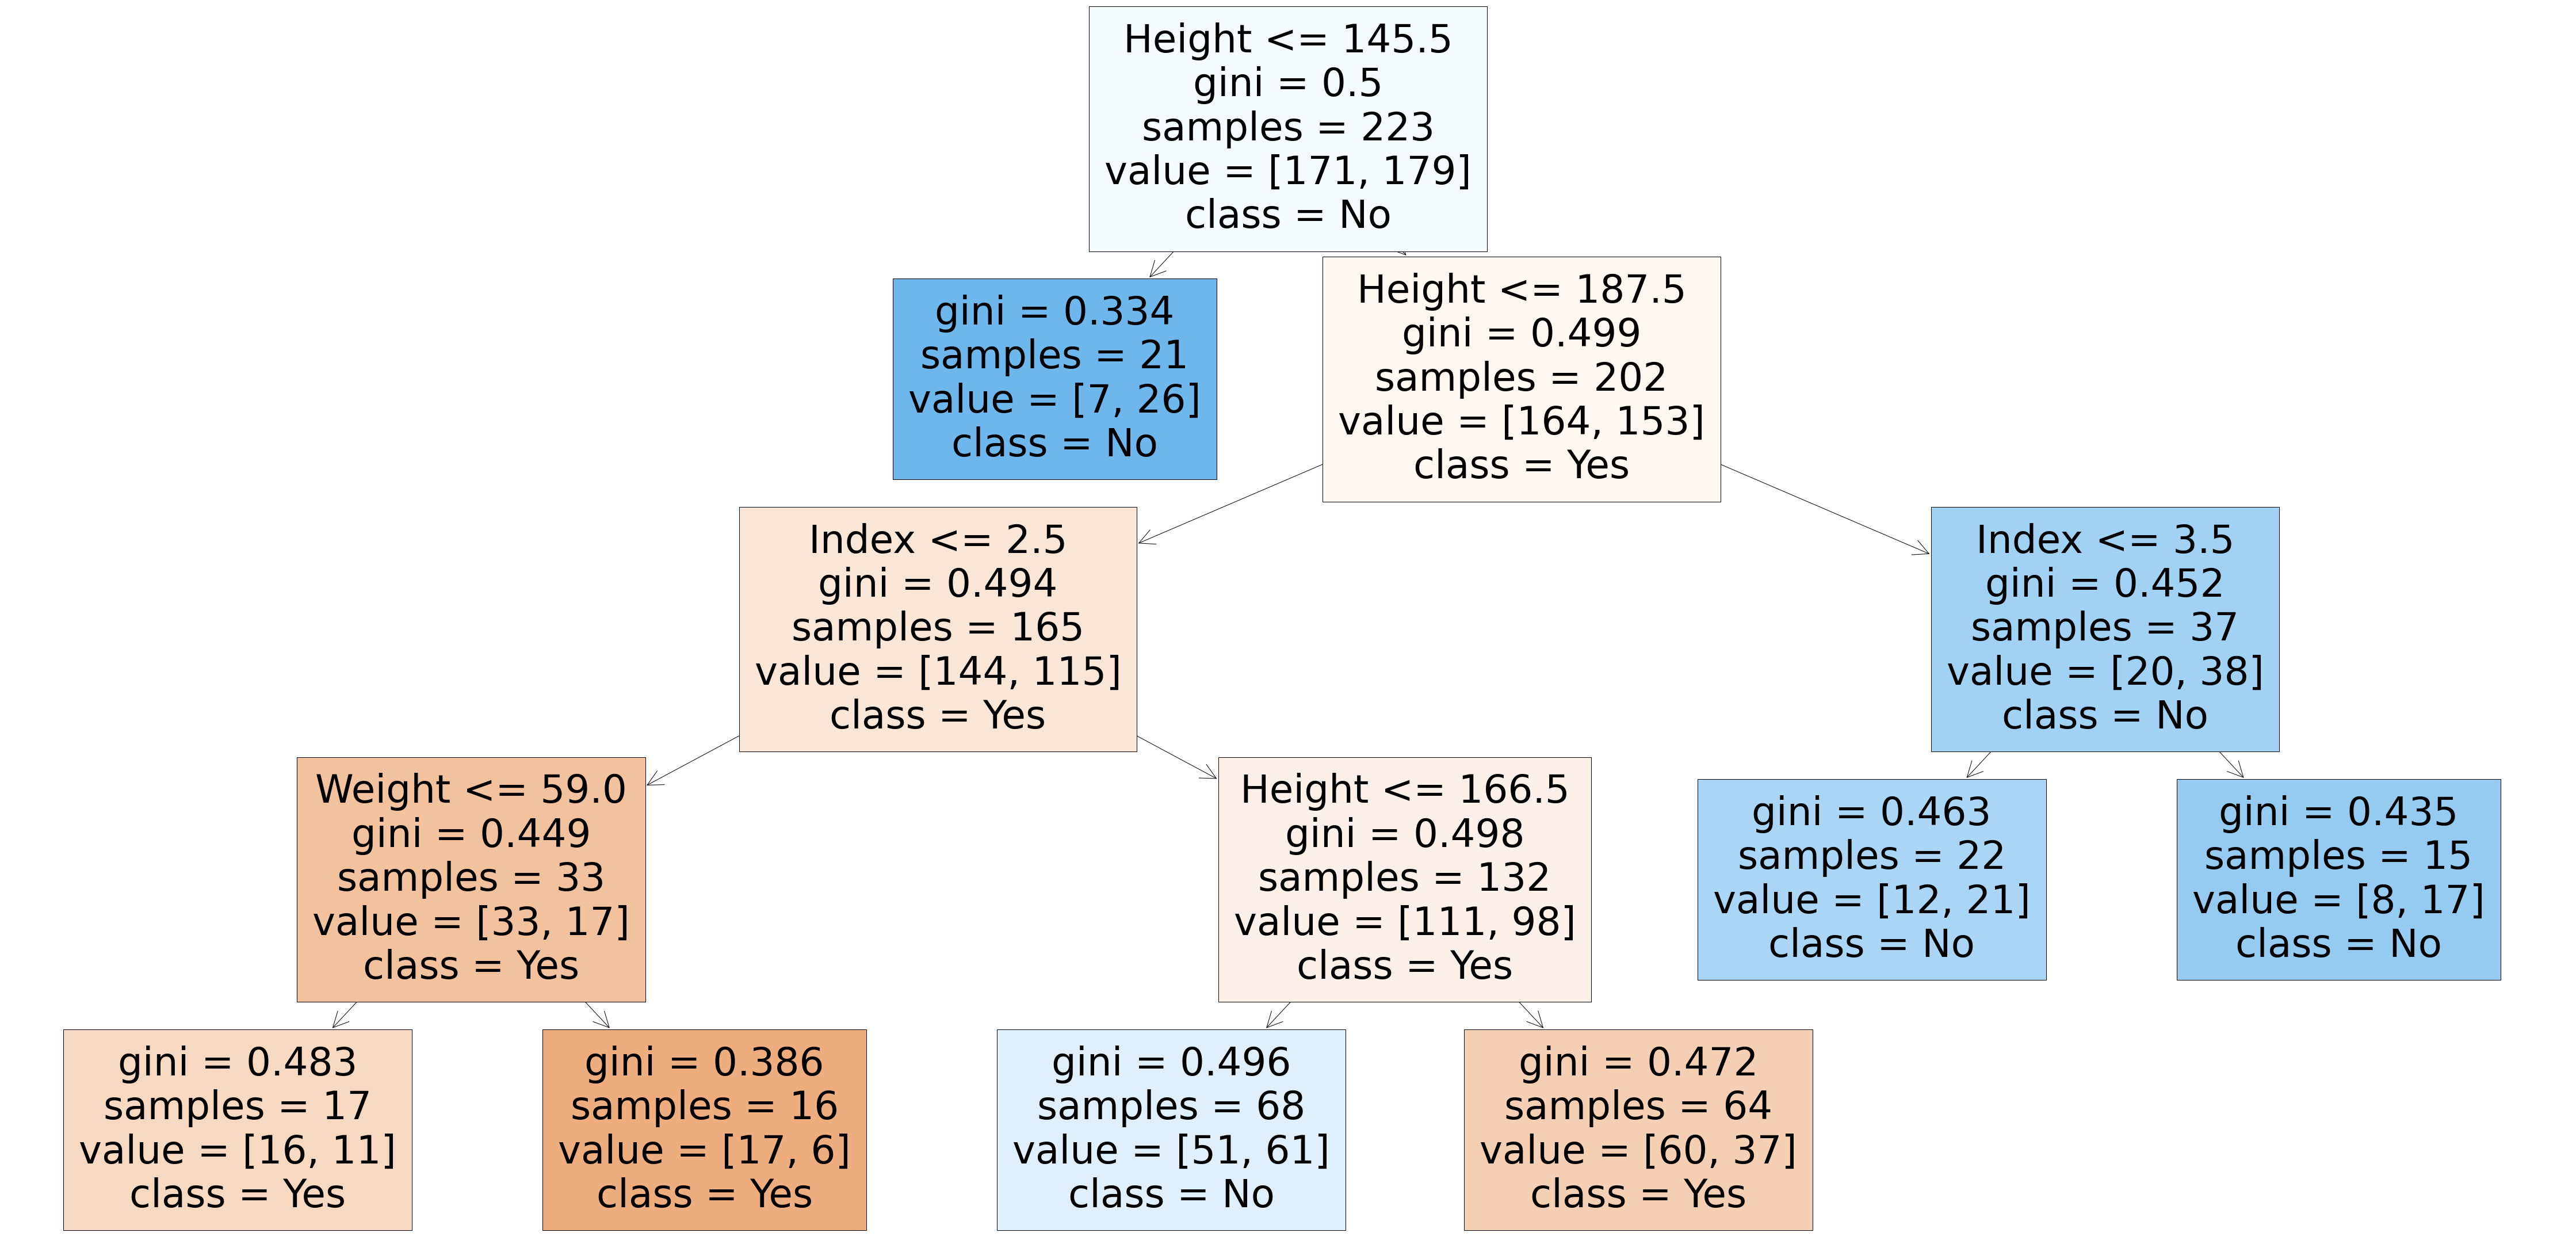

In [18]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=['Yes','No'],filled=True)